<font size=7>Manuscript Figure Plots

# hc112823 - neuron layout

In [4]:
import pickle 
from human_hip.histology import plot_histology, plot_histology_electrode_map
from human_hip.spike_data import read_phy_files, read_autocurated_data

from matplotlib import pyplot as plt
from matplotlib.patches import Patch
import pandas as pd

In [5]:
sd = read_autocurated_data( "/workspaces/human_hippocampus/data/ephys/2023-12-03-e-Hc112823_avv9hckcr1/derived/kilosort2/Hc112823_avv9hckcr1_21841_120323_3_acqm.zip" )


In [6]:
with open("/workspaces/human_hippocampus/data/ephys_raw/2023-12-03-e-Hc112823_avv9hckcr1/acid1_start9s_stop28s_fs1ms.pkl", 'rb') as filename:
    data_raw = pickle.load(filename)
print(data_raw.keys())
print(data_raw["data"].shape)

dict_keys(['data', 'xy', 'frame_rate'])
(1009, 19000)


In [7]:
electrode_mapping = data_raw["xy"].copy()
electrode_mapping[:,1] = data_raw["xy"][:,0]/12.5
electrode_mapping[:,0] = data_raw["xy"][:,1]

In [8]:
image_path = "/workspaces/human_hippocampus/data/histology/hc112823.png"

/tmp/ipykernel_12372/533610742.py:12: DeprecationWarning: Call to deprecated function (or staticmethod) neuron_data. (Use NeuronAttributes instead of neuron_data, with the function load_spike_data())
  for key,val in sd.neuron_data[0].items():


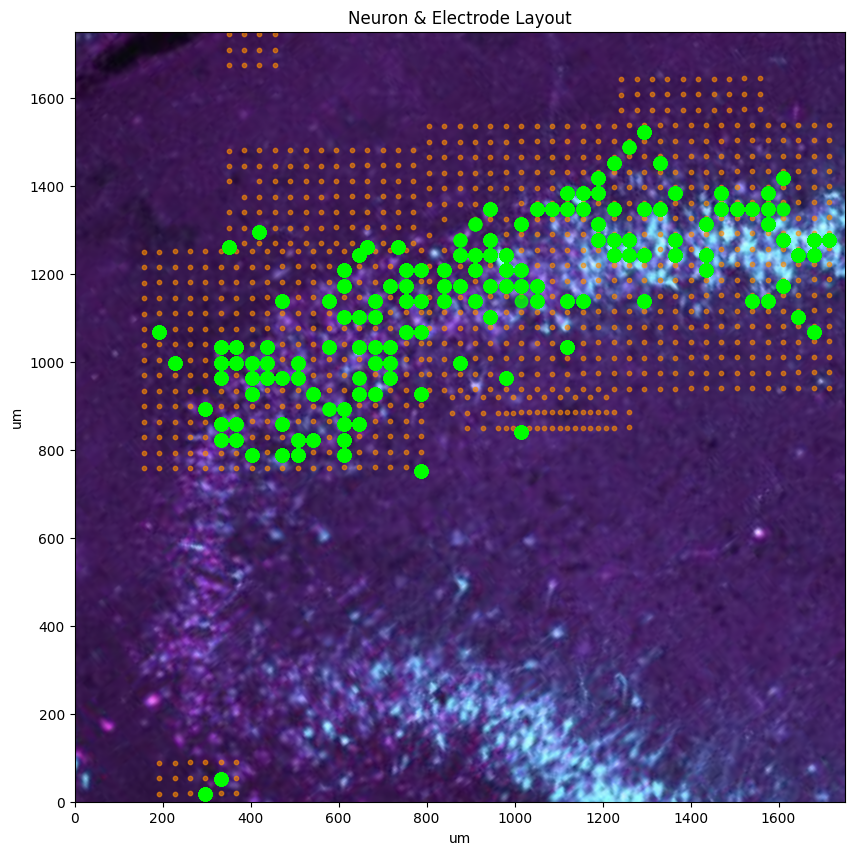

In [14]:
# Add background image
plt.figure(figsize=(15,10))       # Set image size to roughly the shape of the MEA
img = plt.imread(image_path)      # Load in image
plt.imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions

# Plot electrodes
plt.scatter( electrode_mapping[:,0], electrode_mapping[:,1], s=10, alpha=.6, c="darkorange")

# plot neurons
neuron_x = []
neuron_y = []
for key,val in sd.neuron_data[0].items():
    neuron_x.append( val["position"][0] )
    neuron_y.append( val["position"][1] )
    plt.scatter( neuron_x, neuron_y,  c="lime", alpha=.8, s=80 )  

#add legend, axises limits, labels,  and title
# legend_elements = [Patch(facecolor=electrode_color), Patch(facecolor=neuron_color) ]   # Create colors in legend
# plt.legend(legend_elements, ["Electrode","Neuron"])       # Add legend

plt.xlim( 0, 1750 )                                       # Set axis limits to that of the MEA
plt.ylim( 0, 1750 )
plt.xlabel('um')                                         # add axises and title
plt.ylabel('um')
plt.title(f"Neuron & Electrode Layout")
plt.show()  